In [60]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv('data/edges.csv', usecols=[1, 2])
df[['source', 'target']] = df['edge'].str.split(' ', n=1, expand=True)
df.tail()

,edge,count,source,target
466444,zizu232 fancybeekeeper,1,zizu232,fancybeekeeper
466445,znslattt fatafata12,1,znslattt,fatafata12
466446,zoinks27 ravenpvff,1,zoinks27,ravenpvff
466447,zu_capone kukdraws,1,zu_capone,kukdraws
466448,zuqwaylh Kythoarr,1,zuqwaylh,Kythoarr


In [64]:
df_class = pd.read_csv('data/author_class.csv', usecols=[1, 3])
flags = df_class.set_index('author')['i_or_e'].to_dict()

In [3]:
# Create multi directed graph
Graphtype = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(df,source = 'source', target = 'target', edge_key='count', create_using=Graphtype)

In [4]:
H = nx.Graph(G)     # unweighted undirected version

In [5]:
G.number_of_nodes()

26809

In [6]:
G.number_of_edges()

466449

In [7]:
H.number_of_edges()

367695

## Degree distribution analysis

In [8]:
# Average degree
sum(dict(G.degree()).values())/float(len(G))

34.79794098996606

In [9]:
# Average degree
sum(dict(H.degree()).values())/float(len(H))

27.430713566339662

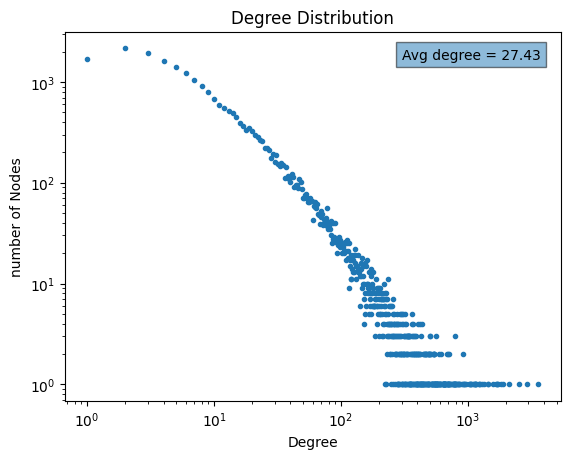

In [10]:
hist_g = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist_g)), hist_g, ".")
plt.text(300, 1700, 'Avg degree = 27.43', fontsize=10, bbox=dict( alpha=0.5))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("number of Nodes")
plt.loglog()
plt.show()

In [ ]:
def plot_dist(G):
    M = nx.to_scipy_sparse_array(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).flatten()
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS', xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_dist(G)

In [11]:
# Average in degree
sum(dict(G.in_degree()).values())/float(len(G))

17.39897049498303

In [12]:
# Average out degree
sum(dict(G.out_degree()).values())/float(len(G))

17.39897049498303

## Connected components analysis

In [13]:
nx.number_connected_components(H)

1

In [14]:
# Diameter for the giant (and only) component
comps = list(nx.connected_components(H))
#nx.diameter(H.subgraph(comps[0]))   #Ci impiega una vita -.-

KeyboardInterrupt: 

In [15]:
nx.density(H)

0.001023228646909119

In [16]:
nx.average_clustering(H)

0.10679322741536111

## ER graph

In [23]:
er = nx.erdos_renyi_graph(26800, 0.001)

In [18]:
er.number_of_nodes()

26800

In [20]:
2*367695/(26800**2)

0.0010238778124303854

In [24]:
er.number_of_edges()

358905

In [39]:
nx.density(er)

0.0009994386068092316

In [25]:
nx.number_connected_components(er)

1

In [26]:
nx.average_clustering(er)

0.0009852914142201169

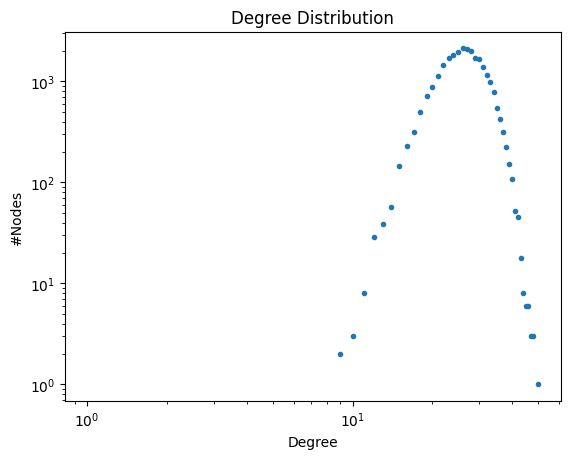

In [41]:
hist_er = nx.degree_histogram(er)

plt.plot(range(0, len(hist_er)), hist_er, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [28]:
# Average degree
sum(dict(er.degree()).values())/float(len(er))

26.783955223880596

In [29]:
np.log(er.number_of_nodes())

10.196157166498947

=> supercritical regime

## BA graph

In [35]:
m = 14  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(26800, m)

In [30]:
367695/26800

13.719962686567165

In [32]:
ba.number_of_nodes()

26800

In [33]:
ba.number_of_edges()

375004

In [36]:
nx.number_connected_components(ba)

1

In [37]:
nx.density(ba)

0.0010442693061057636

In [38]:
nx.average_clustering(ba)

0.006504422331817288

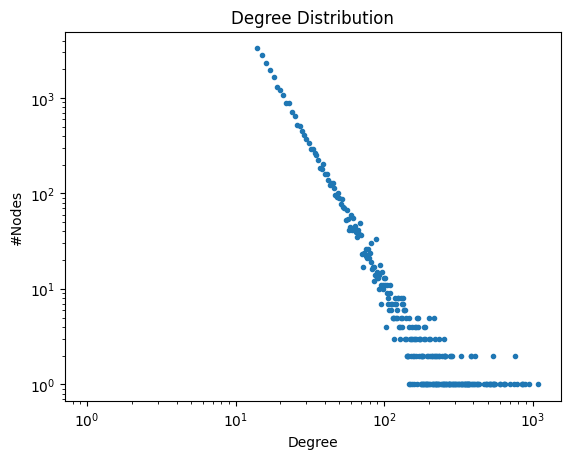

In [42]:
hist_ba = nx.degree_histogram(ba)

plt.plot(range(0, len(hist_ba)), hist_ba, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [ ]:
# Average degree
sum(dict(ba.degree()).values())/float(len(ba))

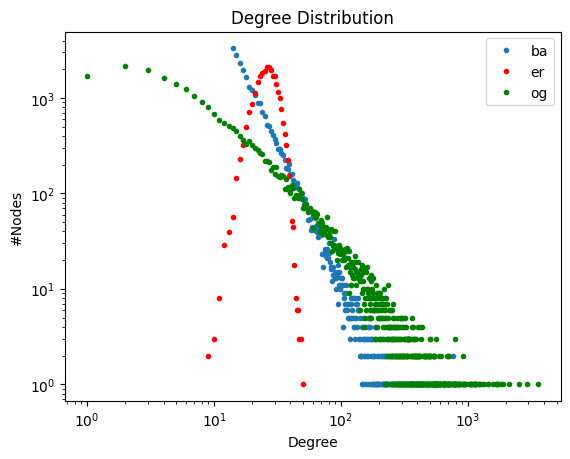

In [43]:
plt.plot(range(0, len(hist_ba)), hist_ba, ".", label = 'ba')
plt.plot(range(0, len(hist_er)), hist_er, ".", color ='red', label = 'er')
plt.plot(range(0, len(hist_g)), hist_g, ".", color = 'green', label = 'og')
plt.legend()
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

|          | Original | ER     |  BA  |
| -------- | -------  | ------ |------|
| `N`      | 32724    |  32700 |32700 |
| `L`      | 485822   | 48212  |490275|
| `<k>  `  | 29.69     | 2.95   | 30.00 |

## Centrality

In [ ]:
closeness = nx.closeness_centrality(H)

In [ ]:
plt.hist(closeness.values(), bins = 50)
plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')

In [48]:
betweenness = nx.betweenness_centrality(H)

KeyboardInterrupt: 

In [ ]:
plt.hist(betweenness.values(), bins = 50)
plt.title('Betweenness Centrality')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')

In [ ]:
harmonic = nx.harmonic_centrality(H)

In [84]:
eigen = nx.eigenvector_centrality(H)

AttributeError: 'AxesSubplot' object has no attribute 'yscale'

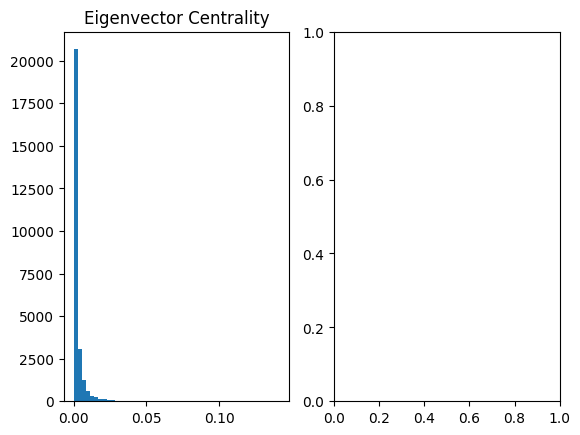

In [116]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(eigen.values(), bins = 50)
axs[0].set_title('Eigenvector Centrality')
axs[0].yscale('log')
axs[1].hist(betweenness.values(), bins = 50)
axs[1].set_title('Betweenness Centrality')
axs[1].yscale('log')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

axs.flat

In [81]:
in_deg = dict(G.in_degree())
in_deg = {key: {'in_deg': in_deg[key], 'flag': flags[key]} for key in in_deg}
out_deg = dict(G.out_degree())
out_deg = {key: {'out_deg': out_deg[key], 'flag': flags[key]} for key in out_deg}

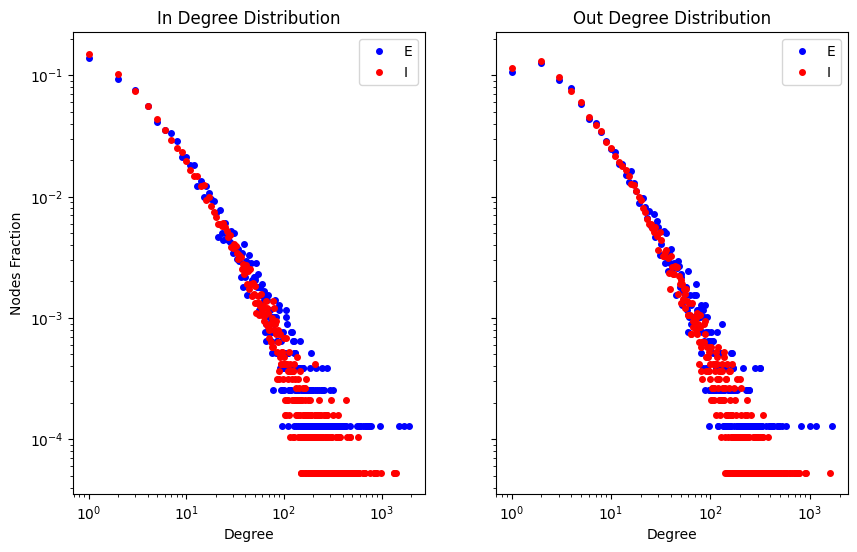

In [125]:
# Extract the degree values
in_degrees_e = [info['in_deg'] for info in in_deg.values() if info['flag'] == 'e']
in_degrees_i = [info['in_deg'] for info in in_deg.values() if info['flag'] == 'i']
out_degrees_e = [info['out_deg'] for info in out_deg.values() if info['flag'] == 'e']
out_degrees_i = [info['out_deg'] for info in out_deg.values() if info['flag'] == 'i']


# Calculate the degree histogram (degree distribution)
in_degree_count_e = Counter(in_degrees_e)
in_degree_count_i = Counter(in_degrees_i)
out_degree_count_e = Counter(out_degrees_e)
out_degree_count_i = Counter(out_degrees_i)


# Normalisation
tot_i = 18999
tot_e =7810

in_degree_hist_e = [in_degree_count_e.get(i, 0) for i in range(max(in_degrees_e) + 1)]
in_degree_hist_e = np.array(in_degree_hist_e) / tot_e
in_degree_hist_i = [in_degree_count_i.get(i, 0) for i in range(max(in_degrees_i) + 1)]
in_degree_hist_i = np.array(in_degree_hist_i) / tot_i
out_degree_hist_e = [out_degree_count_e.get(i, 0) for i in range(max(out_degrees_e) + 1)]
out_degree_hist_e = np.array(out_degree_hist_e) / tot_e
out_degree_hist_i = [out_degree_count_i.get(i, 0) for i in range(max(out_degrees_i) + 1)]
out_degree_hist_i = np.array(out_degree_hist_i) / tot_i

# Plot the degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax1.plot(range(len(in_degree_hist_e)), in_degree_hist_e, ".", markersize=8, label='E', color='blue')
ax1.plot(range(len(in_degree_hist_i)), in_degree_hist_i, ".", markersize=8, label='I', color='red')
ax2.plot(range(len(out_degree_hist_e)), out_degree_hist_e, ".", markersize=8, label='E', color='blue')
ax2.plot(range(len(out_degree_hist_i)), out_degree_hist_i, ".", markersize=8, label='I', color='red')

# Adding titles and labels
ax1.set_title("In Degree Distribution")
ax2.set_title("Out Degree Distribution")
ax1.set_xlabel("Degree")
ax2.set_xlabel("Degree")
ax1.set_ylabel("Nodes Fraction")
ax1.legend()
ax2.legend()

# Set log-log scale
ax1.loglog()
ax2.loglog()

# Show the plot
plt.show()

In [118]:
print(np.mean(in_degrees_e))
print(np.mean(in_degrees_i))
print(np.mean(out_degrees_e))
print(np.mean(out_degrees_i))

18.786683738796416
16.828517290383704
18.286043533930858
17.03431759566293
